# Compare CCL against benchmarks
This notebook performs comparisons of CCL against our benchmarks for different cosmological quantities. These plots are presented in the CCL paper. Benchmarks are documented in the CCL wiki: https://github.com/LSSTDESC/CCL/wiki/Benchmarks

In [1]:
import numpy as np
import pylab as plt
import pyccl as ccl
from scipy.interpolate import interp1d
%matplotlib inline

## Benchmark cosmologies 
`Cosmology` objects contain the parameters and metadata needed as inputs to most functions. Each `Cosmology` object has a set of cosmological parameters attached to it. In this example, we will only use the parameters of a vanilla LCDM model, but simple extensions (like curvature, neutrino mass, and w0/wa) are also supported.

`Cosmology` objects also contain precomputed data (e.g. splines) to help speed-up certain calculations. As such, `Cosmology` objects are supposed to be immutable; you should create a new `Cosmology` object when you want to change the values of any cosmological parameters.

The cosmologies we are setting up at this stage are documented in the CCL paper, Table 2. With the following plots, we verify the level of accuracy stated in Table 3.

In [30]:
params_ccl1=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, Neff=0)
#Ensure Omega_g and Omega_l have the right values, overwriting fiducials from ccl.Parameters
params_ccl1.parameters.Omega_g =0.
params_ccl1.parameters.Omega_l =0.7
#Only now that parameters are correct we can set up the cosmology
cosmo_ccl1 = ccl.Cosmology(params_ccl1)
params_ccl2=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, Neff=0)
params_ccl2.parameters.Omega_g =0.
params_ccl2.parameters.Omega_l =0.7
cosmo_ccl2 = ccl.Cosmology(params_ccl2)
params_ccl3=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0)
params_ccl3.parameters.Omega_g =0.
params_ccl3.parameters.Omega_l =0.7
cosmo_ccl3 = ccl.Cosmology(params_ccl3)
params_ccl4=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, Omega_k=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0)
params_ccl4.parameters.Omega_g =0.
params_ccl4.parameters.Omega_l =0.65
cosmo_ccl4 = ccl.Cosmology(params_ccl4)
params_ccl5=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, Omega_k=-0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0)
params_ccl5.parameters.Omega_g =0.
params_ccl5.parameters.Omega_l =0.75
cosmo_ccl5 = ccl.Cosmology(params_ccl5)
params_ccl6=ccl.Parameters(Omega_c=0.3, Omega_b=0.0, h=0.7, sigma8 = 0.8, n_s=0.96, Neff=0)
params_ccl6.parameters.Omega_g =0.
params_ccl6.parameters.Omega_n_rel=0.
params_ccl6.parameters.Omega_l =0.7
cosmo_ccl6= ccl.Cosmology(params_ccl6,transfer_function='bbks',matter_power_spectrum='linear')
cosmo_list=[cosmo_ccl1,cosmo_ccl2,cosmo_ccl3,cosmo_ccl4,cosmo_ccl5,cosmo_ccl6]
num_models=5
num_models_hiz=3

## Background functions

### Cosmological Distances

With the cosmologies set up, we will not compute comoving radial distances and compare them to our input benchmark files. First, let's load the benchmark file. The format is: (z,d1,d2,d3,d4,d5) where z is the redshift, d are distances and 1-5 refers to the cosmologies set up above. The units are Mpc/h.

In [3]:
bench=np.loadtxt('../tests/benchmark/chi_model1-5.txt')
z=bench[1:,0]
d_bench=bench[1:,1:]
scale_fact=1./(1+z)

Now let's calculate CCL predictions to compare against the benchmark. Notice CCL returns quantities in units of Mpc.

In [4]:
def compute_ccl_bench_bg(cosmos,a_list,func,h_power=0) :
    o_ccl=np.transpose(np.array([func(c,a_list)*pow(c['h'],h_power) for c in cosmos]))
    return o_ccl
d_ccl=compute_ccl_bench_bg(cosmo_list[:num_models],scale_fact,ccl.comoving_radial_distance,1.)

And we will now make a plot comparing the two quantities.

/Users/Deep/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


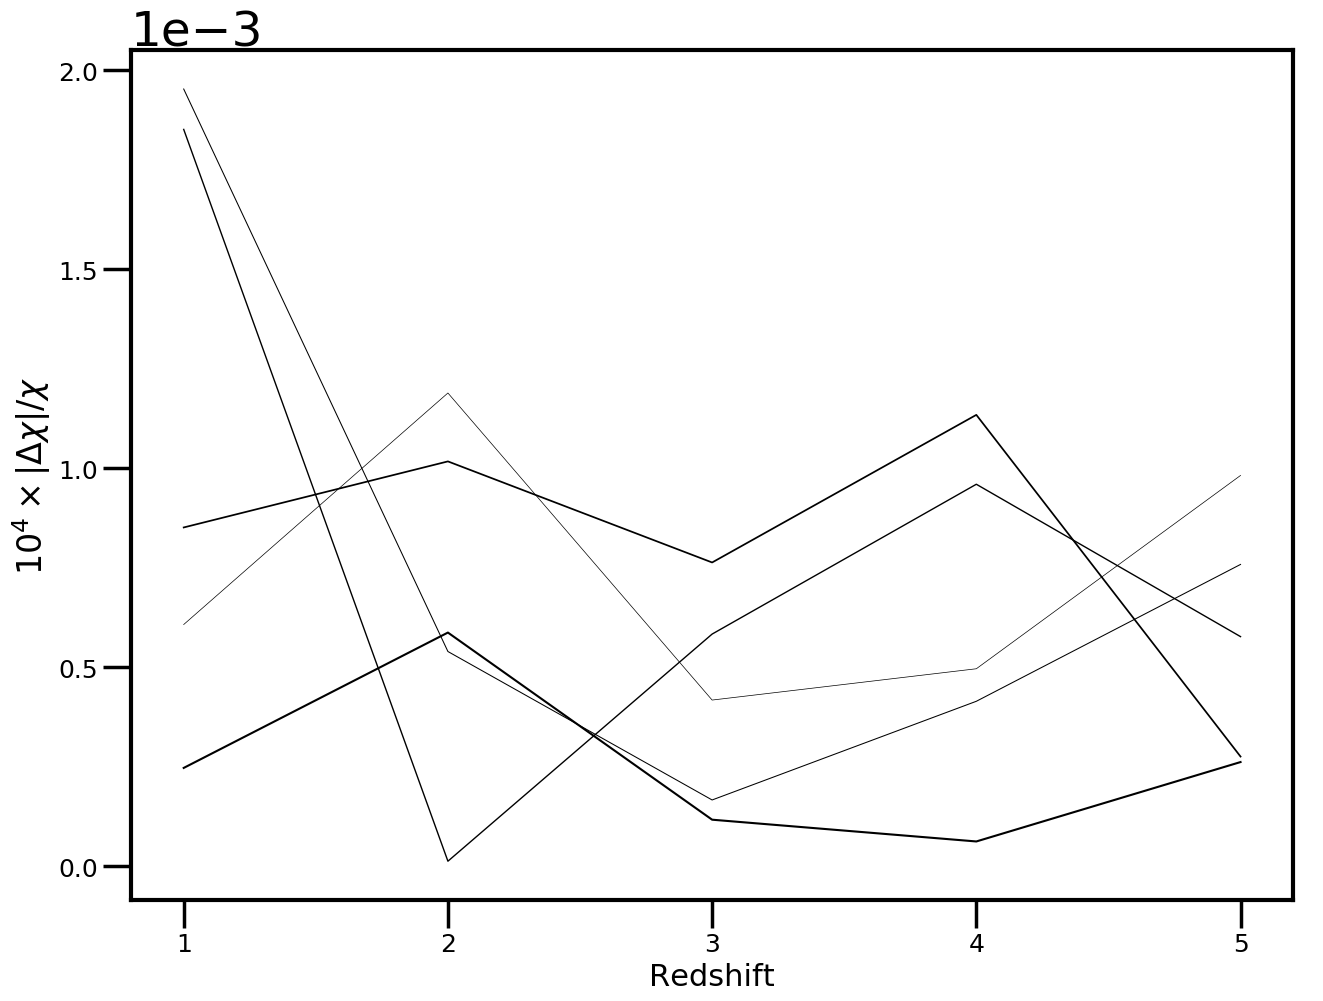

<Figure size 1500x1125 with 0 Axes>

In [5]:
def plot_ccl_bench_bg(f_bench,f_ccl,z_list,title,tol) :
    plt.figure();
    plt.ylabel(title,fontsize=24);
    plt.xlabel('Redshift',fontsize=22);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    for i in range(len(f_bench[0])):
        plt.plot(z_list,np.abs(f_bench[:,i]/f_ccl[:,i]-1)/tol,'k-',lw=i*0.25+0.5);
    plt.show();
    plt.clf();
plot_ccl_bench_bg(d_bench,d_ccl,z,r'$10^4\times|\Delta\chi|/\chi$',1E-4);

### Cosmological distances (high z)

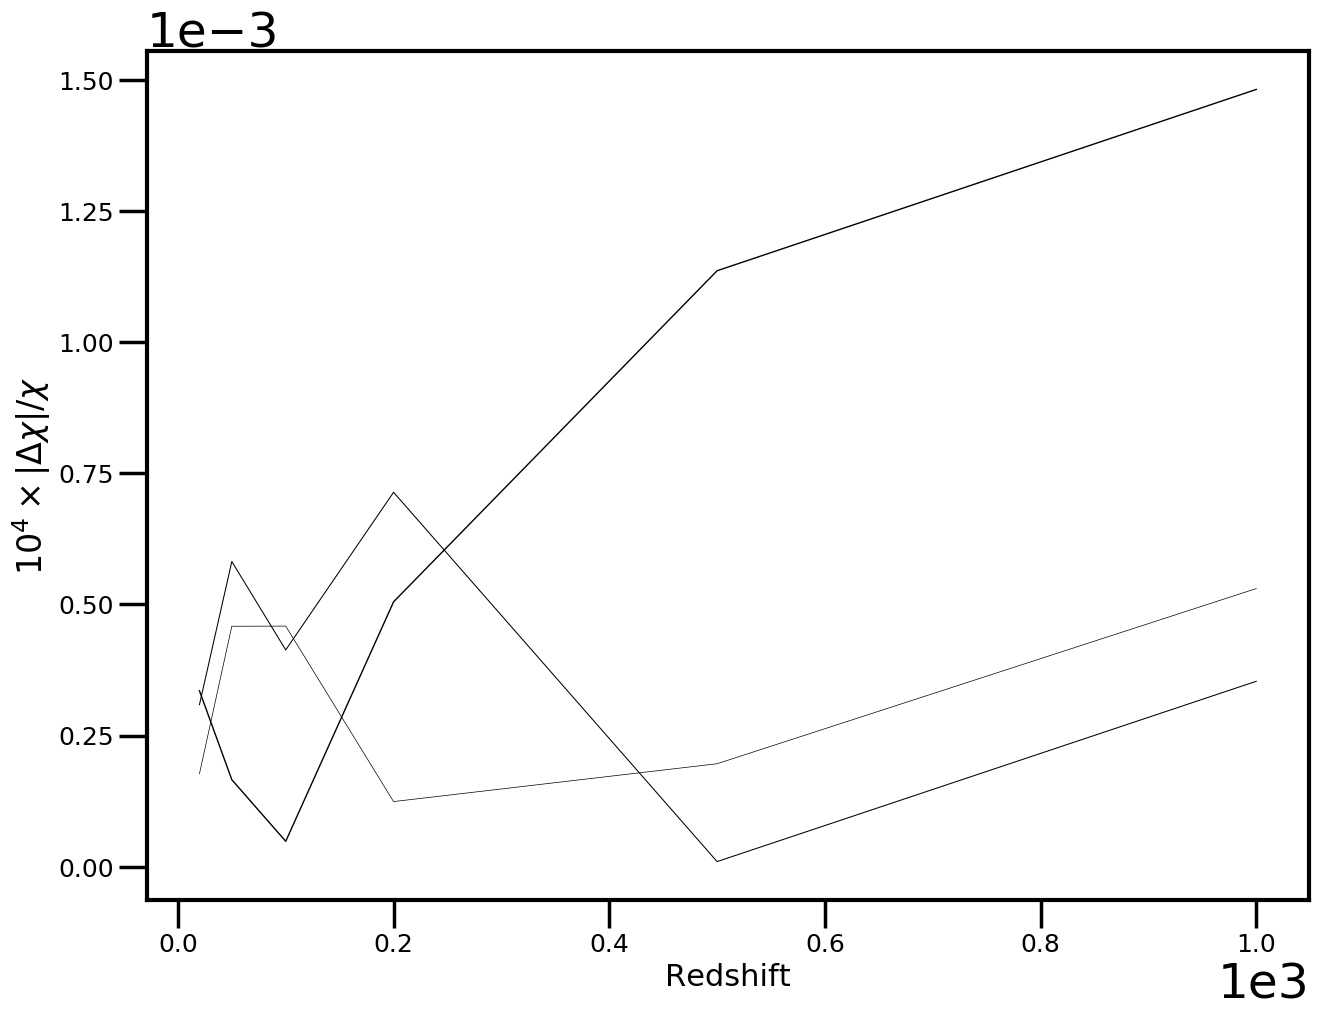

<Figure size 1500x1125 with 0 Axes>

In [6]:
bench=np.loadtxt('../tests/benchmark/chi_hiz_model1-3.txt')
z=bench[1:,0]
d_hiz_bench=bench[1:,1:]
scale_fact=1./(1+z)
d_hiz_ccl=compute_ccl_bench_bg(cosmo_list[:num_models_hiz],scale_fact,ccl.comoving_radial_distance,1.)
plot_ccl_bench_bg(d_hiz_bench,d_hiz_ccl,z,r'$10^4\times|\Delta\chi|/\chi$',1E-4)

### Growth function (low z)

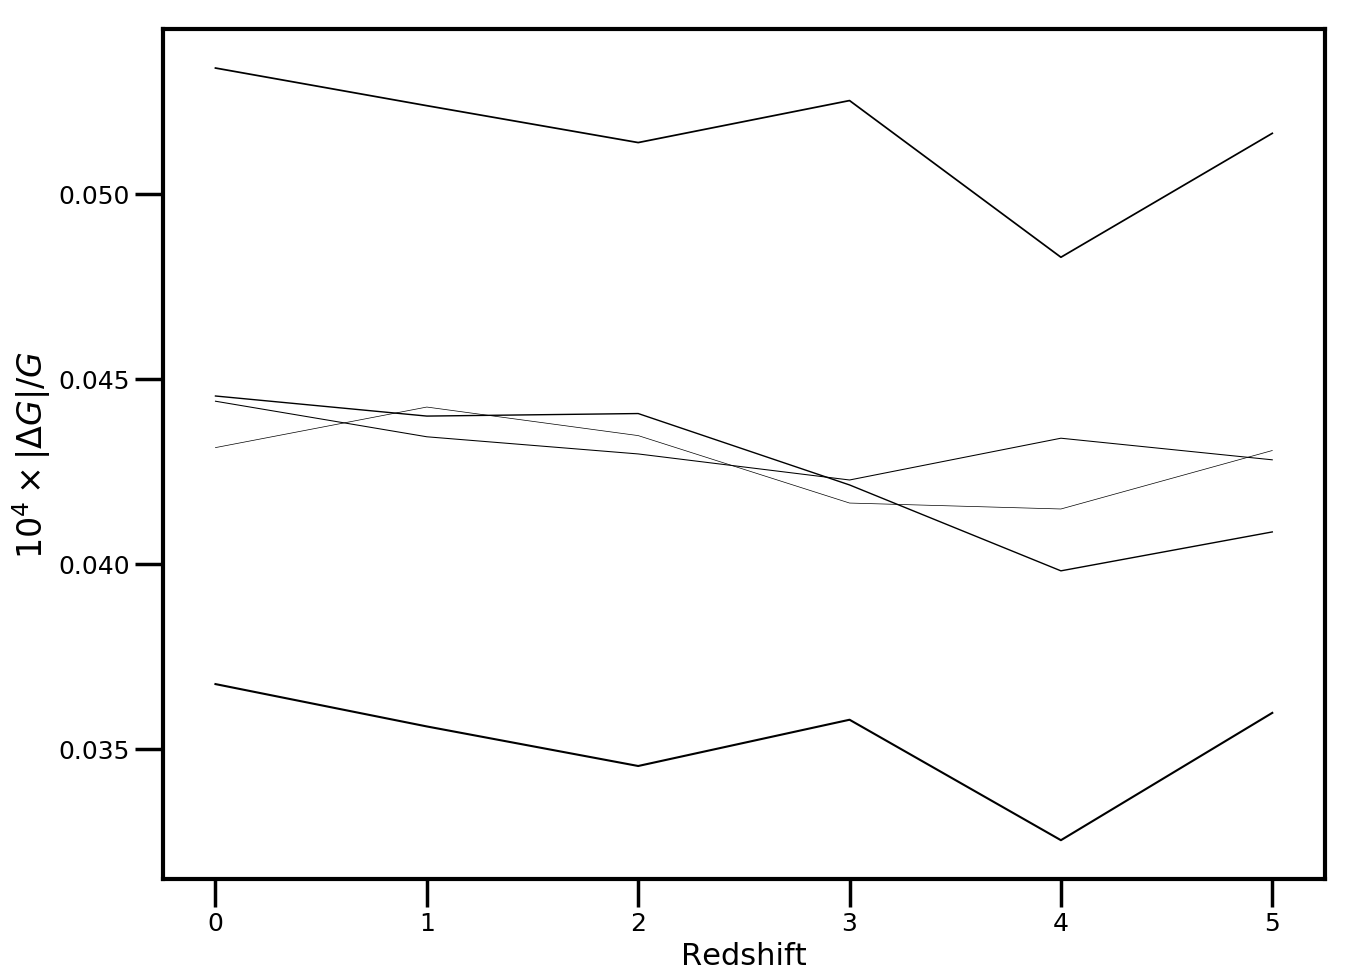

<Figure size 1500x1125 with 0 Axes>

In [7]:
bench=np.loadtxt('../tests/benchmark/growth_model1-5.txt')
z=bench[0:,0]
g_bench=bench[0:,1:]
scale_fact=1./(1+z)
g_ccl=compute_ccl_bench_bg(cosmo_list[:num_models],scale_fact,ccl.growth_factor_unnorm,0.)
plot_ccl_bench_bg(g_bench,g_ccl,z,r'$10^4\times|\Delta G|/G$',1E-4)

### Growth function (high z)

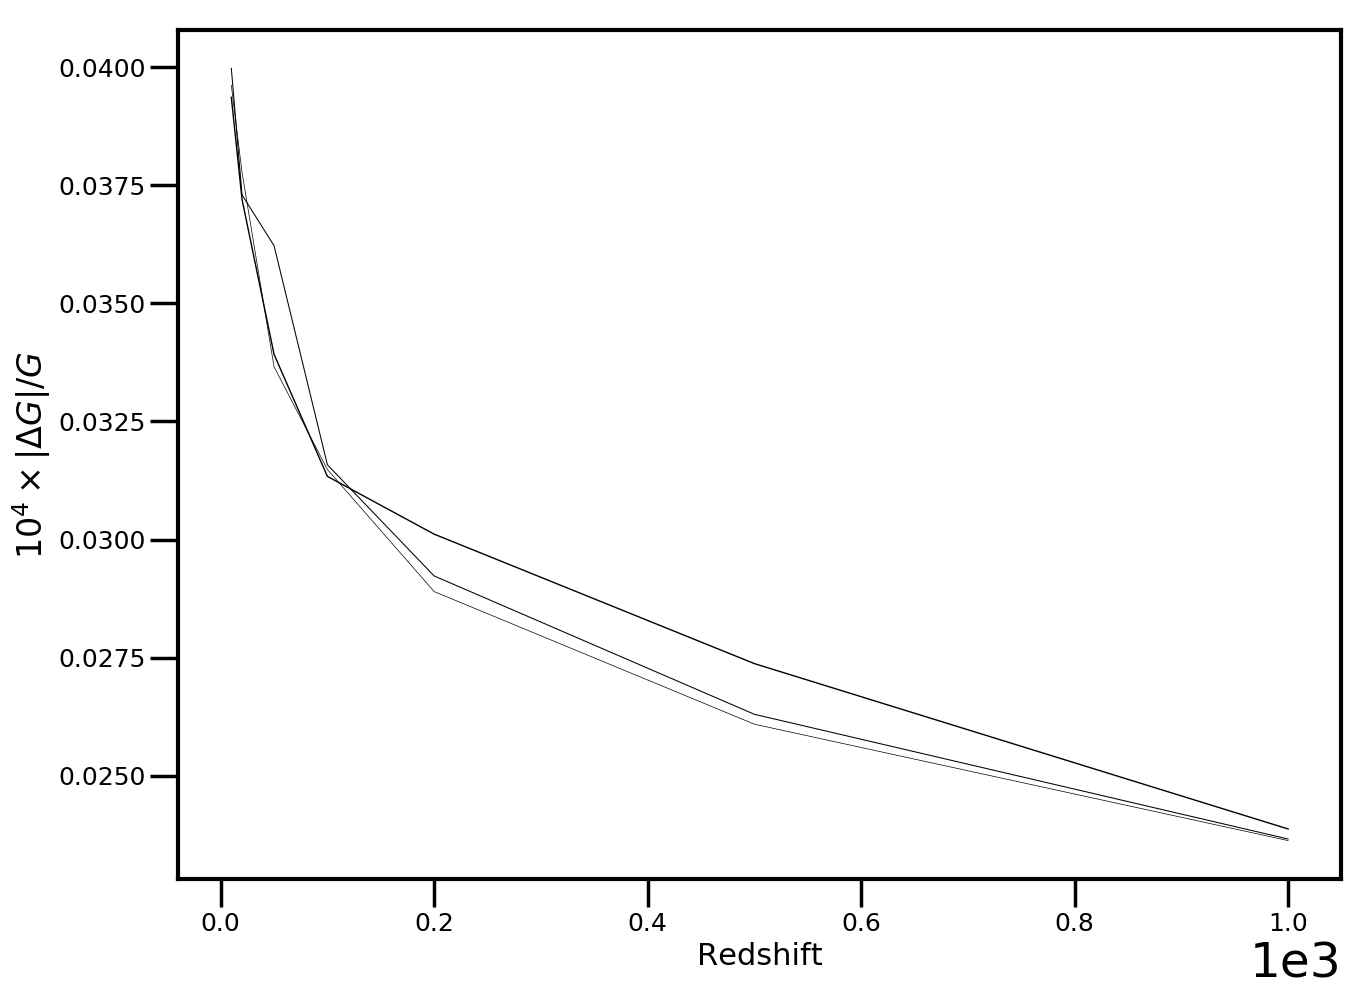

<Figure size 1500x1125 with 0 Axes>

In [8]:
bench=np.loadtxt('../tests/benchmark/growth_hiz_model1-3.txt')
z=bench[0:,0]
num_z = np.shape(bench)[0]
g_hiz_bench=bench[0:,1:]
scale_fact=1./(1+z)
bench=np.loadtxt('../tests/benchmark/growth_model1-5.txt')
g_hiz_ccl=compute_ccl_bench_bg(cosmo_list[:num_models_hiz],scale_fact,ccl.growth_factor_unnorm,0.)
plot_ccl_bench_bg(g_hiz_bench,g_hiz_ccl,z,r'$10^4\times|\Delta G|/G$',1E-4)

## Angular power spectra

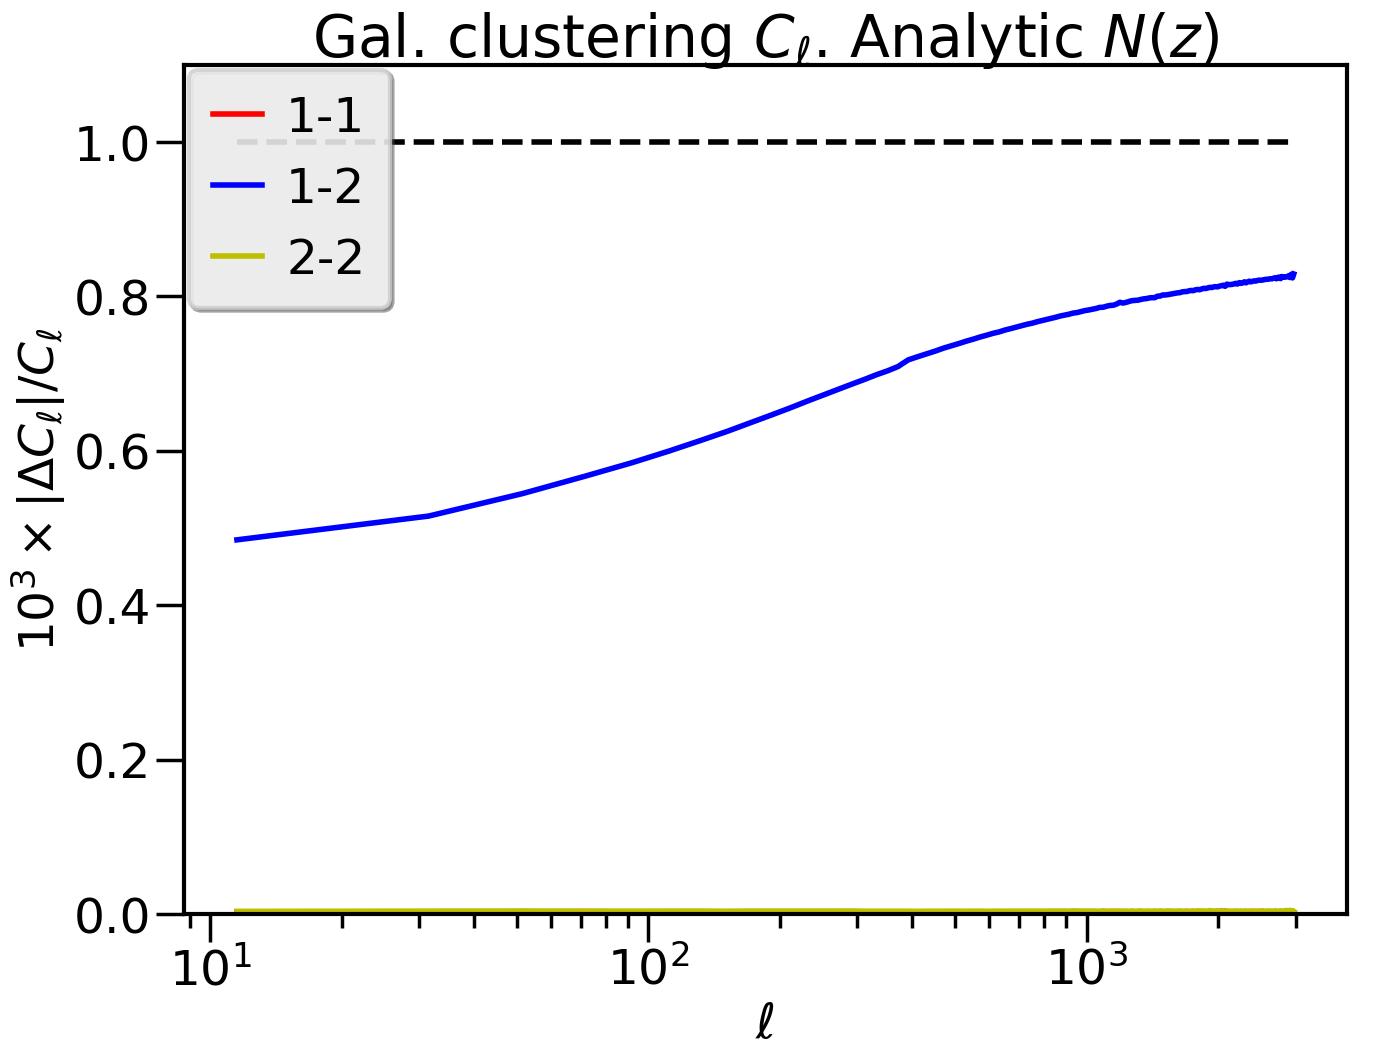

<Figure size 1500x1125 with 0 Axes>

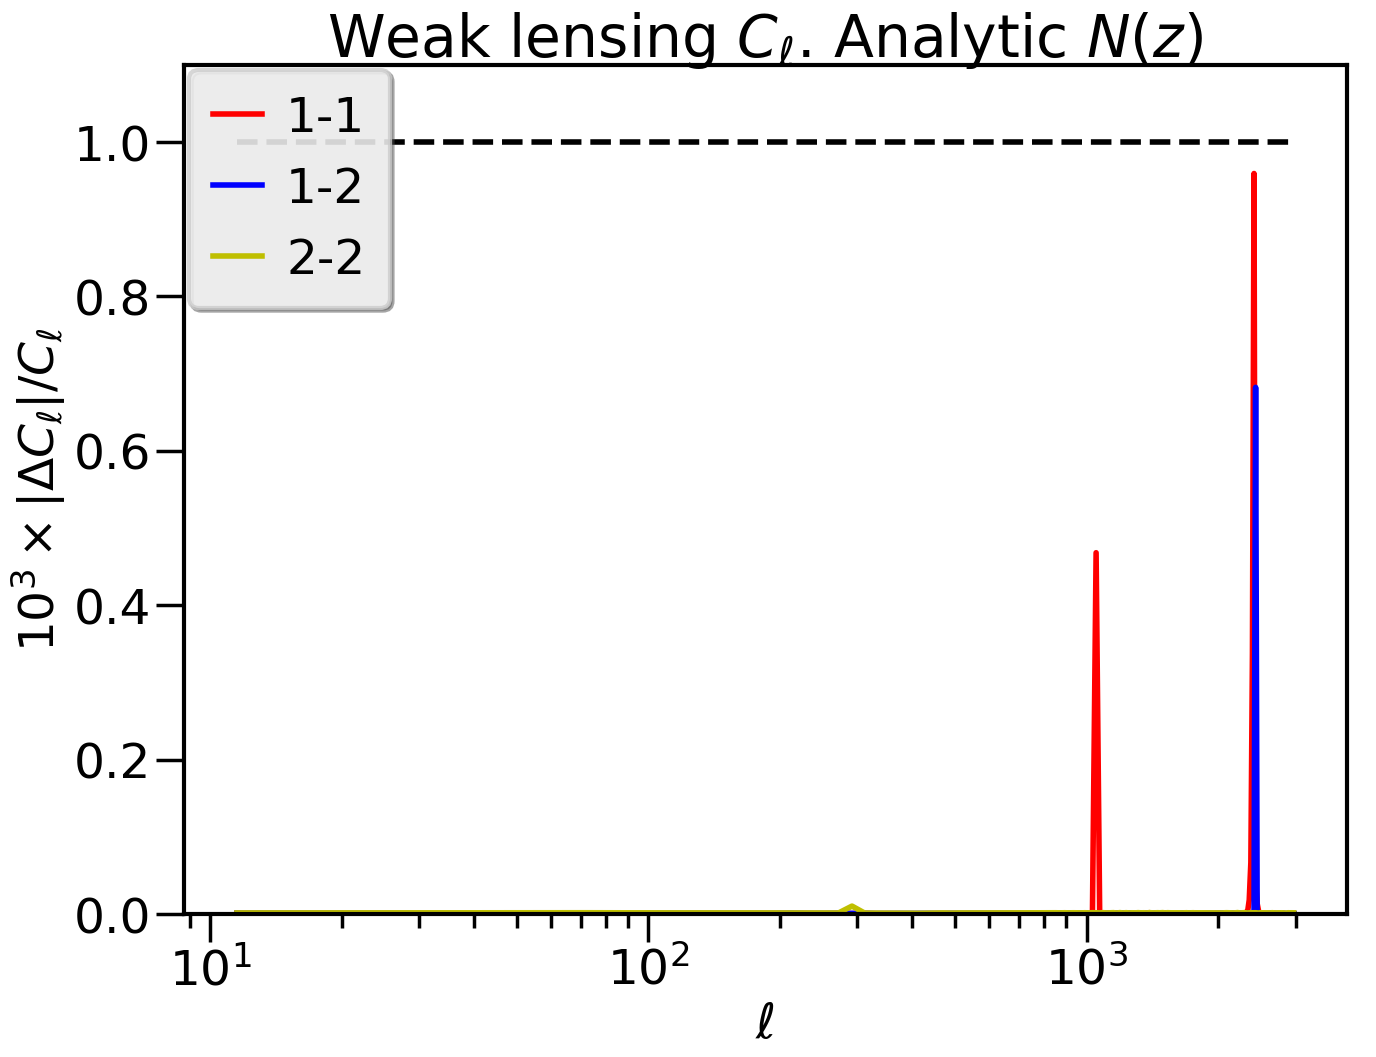

<Figure size 1500x1125 with 0 Axes>

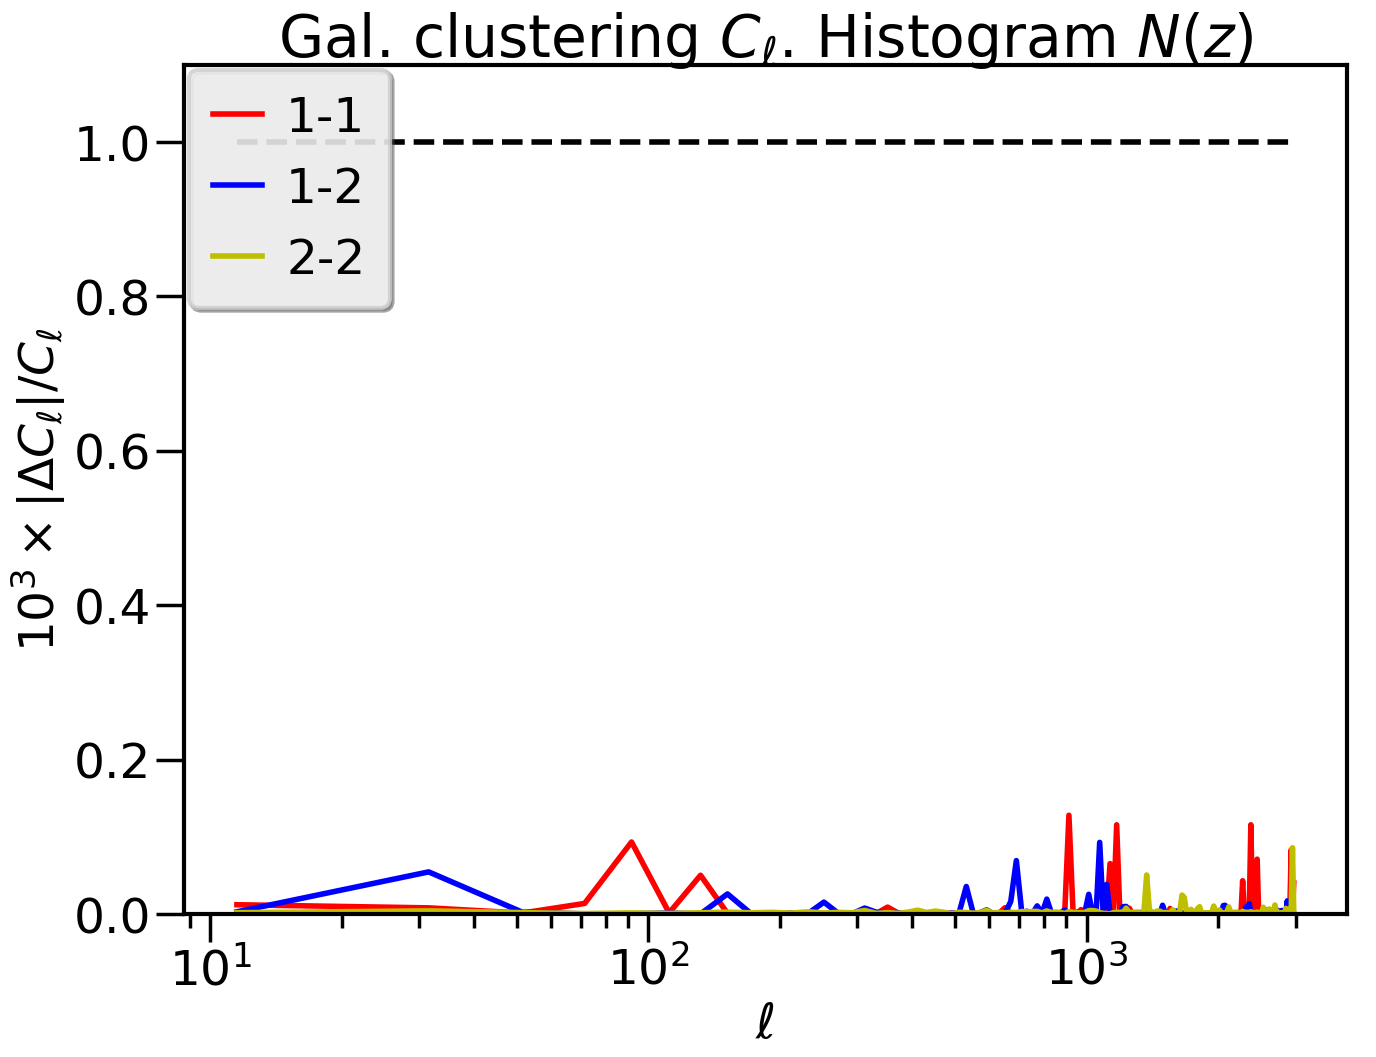

<Figure size 1500x1125 with 0 Axes>

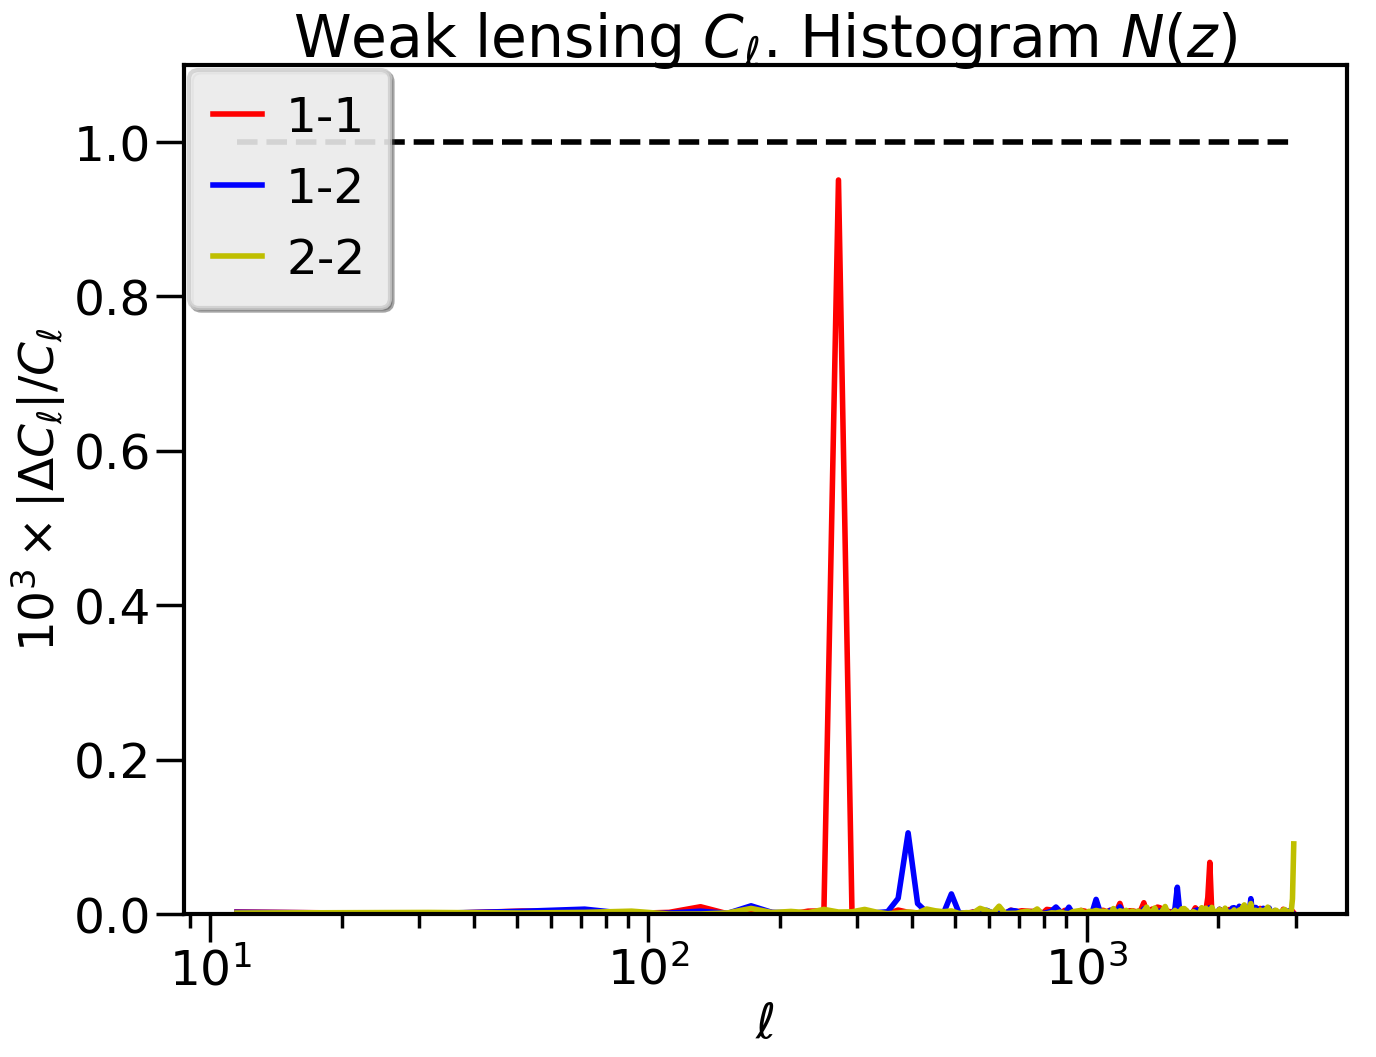

<Figure size 1500x1125 with 0 Axes>

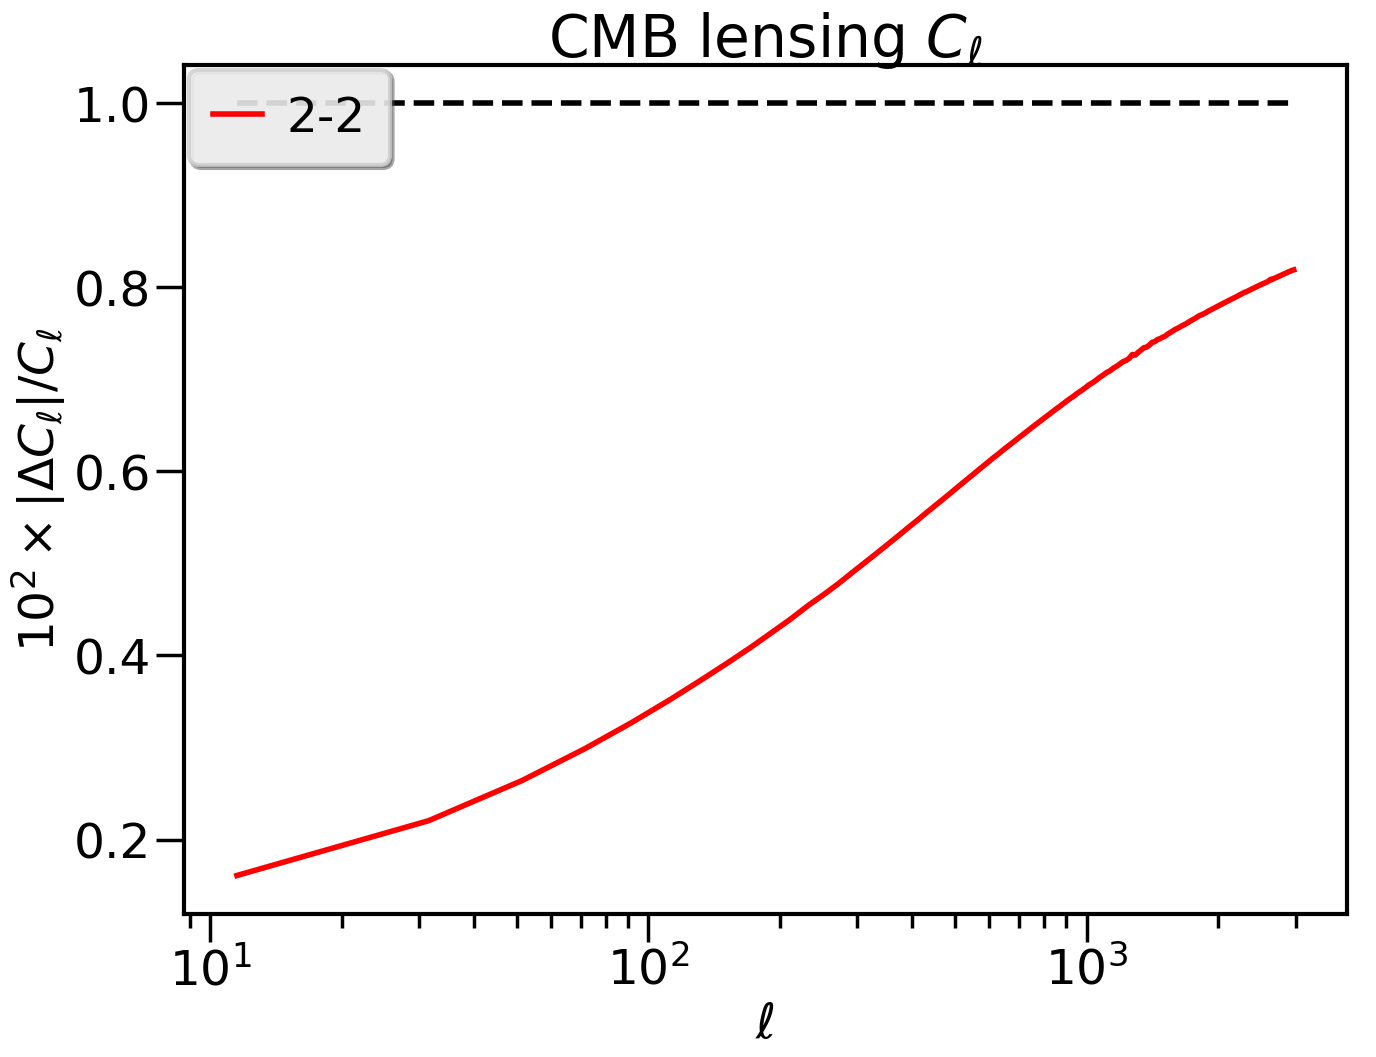

<Figure size 1500x1125 with 0 Axes>

In [41]:
#Redshift distribution
zmean1=1.0; zmean2=1.5;
sigz1=0.15; sigz2=0.15;
nzs=512;

z_a_1=np.linspace(zmean1-5*sigz1,zmean1+5*sigz1,nzs);
z_a_2=np.linspace(zmean2-5*sigz2,zmean2+5*sigz2,nzs);
pz_a_1=np.exp(-0.5*((z_a_1-zmean1)/sigz1)**2)
pz_a_2=np.exp(-0.5*((z_a_2-zmean2)/sigz2)**2)
bz_a_1=np.ones_like(z_a_1); bz_a_2=np.ones_like(z_a_2);

z_h_1,pz_h_1=np.loadtxt("../tests/benchmark/codecomp_step2_outputs/bin1_histo.txt",unpack=True)
z_h_2,pz_h_2=np.loadtxt("../tests/benchmark/codecomp_step2_outputs/bin2_histo.txt",unpack=True)
bz_h_1=np.ones_like(z_h_1); bz_h_2=np.ones_like(z_h_2);

zarrs={'analytic':{'b1':{'z':z_a_1,'nz':pz_a_1,'bz':bz_a_1},'b2':{'z':z_a_2,'nz':pz_a_2,'bz':bz_a_2}},
      'histo':{'b1':{'z':z_h_1,'nz':pz_h_1,'bz':bz_h_1},'b2':{'z':z_h_2,'nz':pz_h_2,'bz':bz_h_2}}}

#Initialize tracers
cosmo_cls=cosmo_list[-1]
trcrs={}
for nztyp in ['analytic','histo'] :
    trcrs[nztyp]={}
    za=zarrs[nztyp]
    for trtyp in ['dd','ll'] :
        trcrs[nztyp][trtyp]={}
        for bn in ['b1','b2'] :
            if trtyp=='dd' :
                trcrs[nztyp][trtyp][bn]=ccl.ClTracerNumberCounts(cosmo_cls,False,False,
                                                                (za[bn]['z'],za[bn]['nz']),
                                                                (za[bn]['z'],za[bn]['bz']))
            else :
                trcrs[nztyp][trtyp][bn]=ccl.ClTracerLensing(cosmo_cls,False,
                                                            (za[bn]['z'],za[bn]['nz']))
trcrs['cmblens']=ccl.ClTracerCMBLensing(cosmo_cls,1100.)

#Read benchmarks
cl_bench={}
for nztyp in ['analytic','histo'] :
    cl_bench[nztyp]={}
    for trtyp in ['dd','ll'] :
        cl_bench[nztyp][trtyp]={}
        for cortyp in ['b1b1','b1b2','b2b2'] :
            cl_bench[nztyp][trtyp][cortyp]={}
            l,cl=np.loadtxt("../tests/benchmark/codecomp_step2_outputs/run_"+cortyp+nztyp+
                            "_log_cl_"+trtyp+".txt",unpack=True)
            cl_bench[nztyp][trtyp][cortyp]['ell']=l.astype(int)
            cl_bench[nztyp][trtyp][cortyp]['cell']=cl
cl_bench['cmblens']={}
l,cl=np.loadtxt("../tests/benchmark/codecomp_step2_outputs/run_log_cl_cc.txt",unpack=True)
cl_bench['cmblens']['ell']=l.astype(int)
cl_bench['cmblens']['cell']=cl
            
#Compute ccl predictions
cl_ccl={}
for nztyp in ['analytic','histo'] :
    cl_ccl[nztyp]={}
    for trtyp in ['dd','ll'] :
        cl_ccl[nztyp][trtyp]={}
        cl_ccl[nztyp][trtyp]['b1b1']={}
        ells=cl_bench[nztyp][trtyp]['b1b1']['ell']
        cfac=np.ones(len(ells))
        if trtyp=='ll' :
            cfac[2:]=ells[2:]*(ells[2:]+1.)/np.sqrt((ells[2:]+2.)*(ells[2:]+1.)*ells[2:]*(ells[2:]-1.))
        cl_ccl[nztyp][trtyp]['b1b1']['ell']=ells
        cl_ccl[nztyp][trtyp]['b1b1']['cell']=ccl.angular_cl(cosmo_cls,trcrs[nztyp][trtyp]['b1'],
                                                            trcrs[nztyp][trtyp]['b1'],ells,dlk=0.01)*cfac**2
        cl_ccl[nztyp][trtyp]['b1b2']={}
        ells=cl_bench[nztyp][trtyp]['b1b2']['ell']
        cfac=np.ones(len(ells))
        if trtyp=='ll' :
            cfac[2:]=ells[2:]*(ells[2:]+1.)/np.sqrt((ells[2:]+2.)*(ells[2:]+1.)*ells[2:]*(ells[2:]-1.))
        cl_ccl[nztyp][trtyp]['b1b2']['ell']=ells
        cl_ccl[nztyp][trtyp]['b1b2']['cell']=ccl.angular_cl(cosmo_cls,trcrs[nztyp][trtyp]['b1'],
                                                            trcrs[nztyp][trtyp]['b2'],ells,dlk=0.01)*cfac**2
        cl_ccl[nztyp][trtyp]['b2b2']={}
        ells=cl_bench[nztyp][trtyp]['b2b2']['ell']
        cfac=np.ones(len(ells))
        if trtyp=='ll' :
            cfac[2:]=ells[2:]*(ells[2:]+1.)/np.sqrt((ells[2:]+2.)*(ells[2:]+1.)*ells[2:]*(ells[2:]-1.))
        cl_ccl[nztyp][trtyp]['b2b2']['ell']=ells
        cl_ccl[nztyp][trtyp]['b2b2']['cell']=ccl.angular_cl(cosmo_cls,trcrs[nztyp][trtyp]['b2'],
                                                            trcrs[nztyp][trtyp]['b2'],ells,dlk=0.01)*cfac**2
cl_ccl['cmblens']={}
cl_ccl['cmblens']['ell']=cl_bench['cmblens']['ell']
cl_ccl['cmblens']['cell']=ccl.angular_cl(cosmo_cls,trcrs['cmblens'],trcrs['cmblens'],cl_ccl['cmblens']['ell'],dlk=0.01)

#Plot results
lrange=2980
nrebin=20
names={'analytic':'Analytic','histo':'Histogram','dd':'Gal. clustering','ll':'Weak lensing',
       'b1b1':'1-1','b1b2':'1-2','b2b2':'2-2','cb1b1':'r','cb1b2':'b','cb2b2':'y'};
for nztyp in ['analytic','histo'] :
    for trtyp in ['dd','ll'] :
        title=names[trtyp]+r' $C_\ell$. '+names[nztyp]+r' $N(z)$'
        plt.figure()
        plt.title(title)
        plt.ylabel(r'$10^3\times|\Delta C_\ell|/C_\ell$')
        plt.xlabel(r'$\ell$')
        for cortyp in ['b1b1','b1b2','b2b2'] :
            di_bench=cl_bench[nztyp][trtyp][cortyp];
            di_ccl=cl_ccl[nztyp][trtyp][cortyp];
            larr=np.mean(di_bench['ell'][2:2+lrange].astype(float).reshape([lrange/nrebin,nrebin]),axis=1);
            bencharr=np.mean(di_bench['cell'][2:2+lrange].reshape([lrange/nrebin,nrebin]),axis=1);
            cclarr=np.mean(di_ccl['cell'][2:2+lrange].reshape([lrange/nrebin,nrebin]),axis=1);
            plt.plot(larr,1E3*np.abs(cclarr/bencharr-1),names['c'+cortyp]+'-',label=names[cortyp]);
        plt.plot(larr,np.ones_like(larr),'k--')
        plt.xscale('log');
        plt.ylim([0,1.1])
        plt.legend(loc='upper left');
        plt.show();
        plt.clf();
        title=names[trtyp]+r' $C_\ell$. '+names[nztyp]+r' $N(z)$'

plt.figure()
plt.title('CMB lensing '+r'$C_\ell$');
plt.ylabel(r'$10^2\times|\Delta C_\ell|/C_\ell$')
plt.xlabel(r'$\ell$')
di_bench=cl_bench['cmblens'];
di_ccl=cl_ccl['cmblens'];
larr=np.mean(di_bench['ell'][2:2+lrange].astype(float).reshape([lrange/nrebin,nrebin]),axis=1);
bencharr=np.mean(di_bench['cell'][2:2+lrange].reshape([lrange/nrebin,nrebin]),axis=1);
cclarr=np.mean(di_ccl['cell'][2:2+lrange].reshape([lrange/nrebin,nrebin]),axis=1);
plt.plot(larr,1E2*np.abs(cclarr/bencharr-1),'r-',label=names[cortyp]);
plt.plot(larr,np.ones_like(larr),'k--')
plt.xscale('log');
#plt.ylim([0,1.1])
plt.legend(loc='upper left');
plt.show();
plt.clf();

# Angular Correlation function

In [96]:
#Read benchmarks
bench_err_dd=np.genfromtxt("../tests/benchmark/cov_corr/sigma_clustering_Nbin5",names=('theta','b1b1','b2b2','b1b2'))
bench_err_ll=np.genfromtxt("../tests/benchmark/cov_corr/sigma_xi+_Nbin5",names=('theta','b1b1','b2b2','b1b2'))
bench_err_mm=np.genfromtxt("../tests/benchmark/cov_corr/sigma_xi-_Nbin5",names=('theta','b1b1','b2b2','b1b2'))

corr_bench={}
for nztyp in ['analytic','histo'] :
    corr_bench[nztyp]={}
    for bn in ['b1b1','b2b2'] :
        corr_bench[nztyp][bn]={}
        for trtyp in ['dd','ll'] :
            if  'dd' in trtyp:
                corr_bench[nztyp][bn][trtyp]=np.genfromtxt("../tests/benchmark/codecomp_step2_outputs/run_"+bn+nztyp+"_log_wt_"+trtyp+".txt",names=('theta','xi'))
            else:
                corr_bench[nztyp][bn][trtyp+'+']=np.genfromtxt("../tests/benchmark/codecomp_step2_outputs/run_"+bn+nztyp+"_log_wt_"+trtyp+"_pp.txt",names=('theta','xi'))
                corr_bench[nztyp][bn][trtyp+'-']=np.genfromtxt("../tests/benchmark/codecomp_step2_outputs/run_"+bn+nztyp+"_log_wt_"+trtyp+"_mm.txt",names=('theta','xi'))
                
theta_deg=corr_bench[nztyp][cortyp]['dd']['theta']

In [94]:
#Assume that c_ell are computed above in the Agular_cl benchmark
corr={}
for nztyp in ['analytic','histo'] :
    corr[nztyp]={}
    za=zarrs[nztyp]
    for bn in ['b1b1','b2b2'] :
        corr[nztyp][bn]={}
        for trtyp in ['dd','ll'] :
            ell=cl_ccl[nztyp][trtyp][bn]['ell']
            cell=cl_ccl[nztyp][trtyp][bn]['cell']
            if 'dd' in trtyp:
                corr[nztyp][bn][trtyp]=ccl.correlation(cosmo, ell, cell, theta_deg,
                                                       corr_type='GG', method='FFTLog')
            else :
                corr[nztyp][bn][trtyp+'+']=ccl.correlation(cosmo, ell, cell, theta_deg,
                                                       corr_type='L+', method='FFTLog')
                corr[nztyp][bn][trtyp+'-']=ccl.correlation(cosmo, ell, cell, theta_deg,
                                                       corr_type='L-', method='FFTLog')

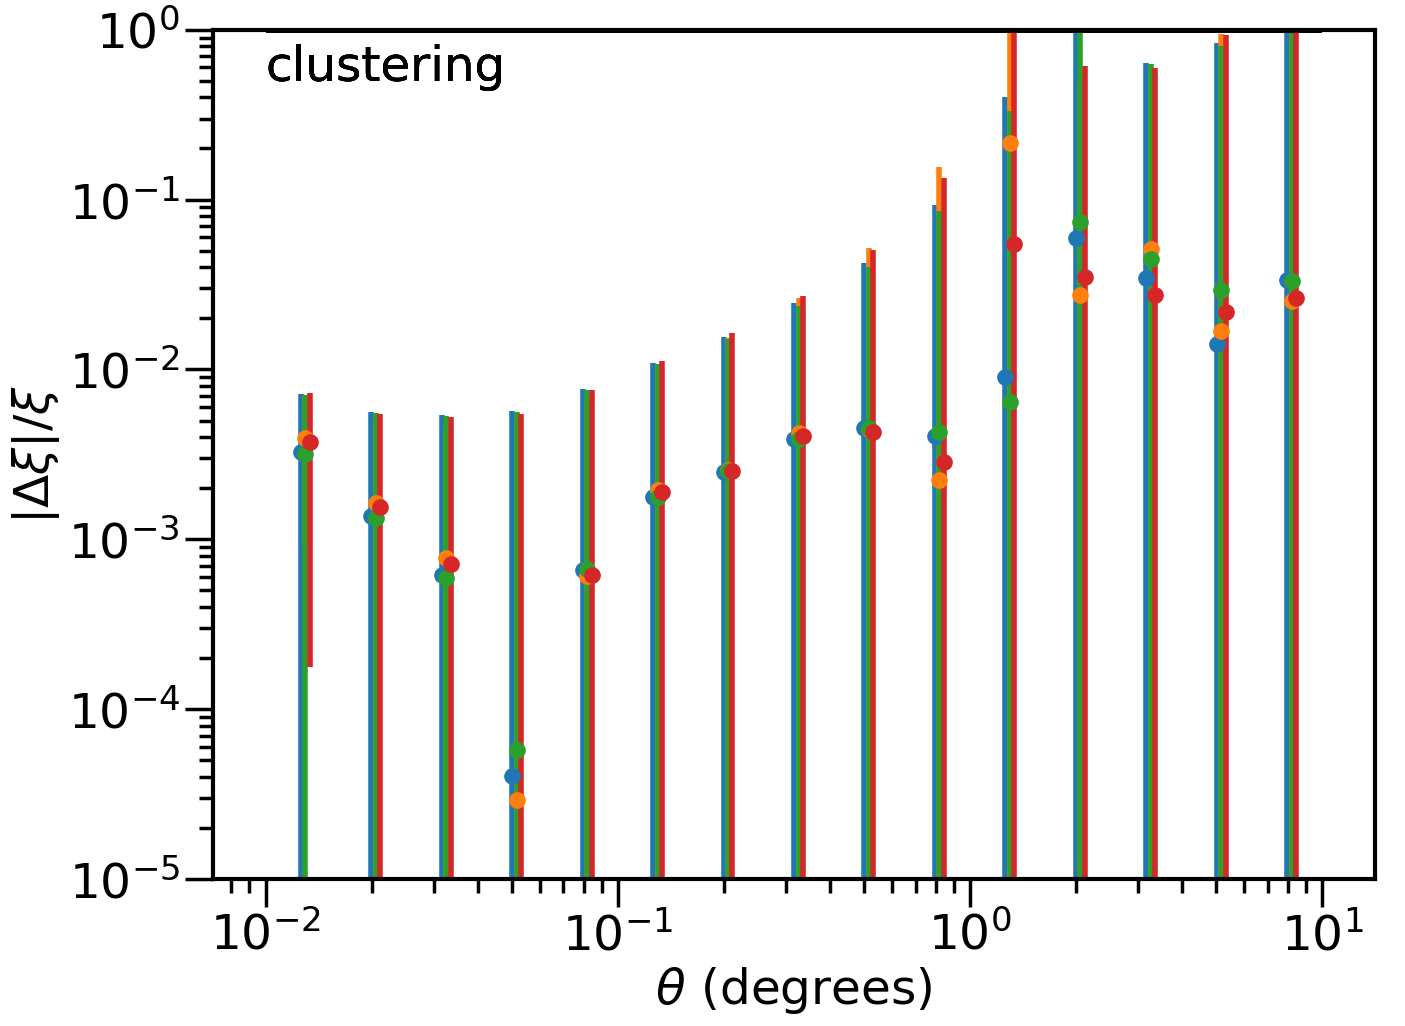

In [143]:
inz=0
for nztyp in ['analytic','histo'] :
    za=zarrs[nztyp]
    ibn=0
    for bn in ['b1b1','b2b2'] :
        for trtyp in ['dd'] :
#             if 'dd' in trtyp:
                plt.errorbar(theta_deg*(1+0.03*(ibn+inz)),np.absolute(corr_bench[nztyp][bn][trtyp]['xi']/corr[nztyp][bn][trtyp]-1),
                             bench_err_dd[bn]/corr[nztyp][bn][trtyp]/10,fmt='o')
                #errors are suppressed by factor of 10
                plt.xscale('log')
                plt.yscale('log')
        plt.hlines(1,0.01,10)
#         plt.ylim(-1.e0,1.e0)
        plt.ylim(1.e-5,1.e0)
        plt.xlabel(r'$\theta$ (degrees)')
        plt.ylabel(r'$|\Delta \xi|/\xi$')
        plt.text(y=0.5,x=0.01,s='clustering')
        ibn+=1
    inz+=1

In [ ]:
inz=0
for nztyp in ['analytic','histo'] :
    za=zarrs[nztyp]
    ibn=0
    for bn in ['b1b1','b2b2'] :
        for trtyp in ['ll+'] :
                plt.errorbar(theta_deg*(1+0.03*(ibn+inz)),np.absolute(corr_bench[nztyp][bn][trtyp]['xi']/corr[nztyp][bn][trtyp]-1),
                             bench_err_dd[bn]/corr[nztyp][bn][trtyp]/100,fmt='o')
                #errors are suppressed by factor of 100
                plt.xscale('log')
                plt.yscale('log')
        plt.hlines(1,0.01,10)
#         plt.ylim(-1.e0,1.e0)
        plt.ylim(1.e-5,1.e0)
        plt.xlabel(r'$\theta$ (degrees)')
        plt.ylabel(r'$|\Delta \xi_+|/\xi_+$')
        plt.text(y=0.5,x=0.01,s='Lensing')
        ibn+=1
    inz+=1

In [ ]:
inz=0
for nztyp in ['analytic','histo'] :
    za=zarrs[nztyp]
    ibn=0
    for bn in ['b1b1','b2b2'] :
        for trtyp in ['ll-'] :
                plt.errorbar(theta_deg*(1+0.03*(ibn+inz)),np.absolute(corr_bench[nztyp][bn][trtyp]['xi']/corr[nztyp][bn][trtyp]-1),
                             bench_err_dd[bn]/corr[nztyp][bn][trtyp]/100,fmt='o')
                #errors are suppressed by factor of 100
                plt.xscale('log')
                plt.yscale('log')
        plt.hlines(1,0.01,10)
#         plt.ylim(-1.e0,1.e0)
        plt.ylim(1.e-5,1.e1)
        plt.xlabel(r'$\theta$ (degrees)')
        plt.ylabel(r'$|\Delta \xi_-|/\xi_-$')
        plt.text(y=0.5,x=0.01,s='Lensing')
        ibn+=1
    inz+=1

# Matter power spectrum

### Cosmological Emulator - case with no neutrinos

We first load the emulator cosmologies. Among them, we will only use models: 1,3,5,6,8,10. We will compare to CCL at z=0. The requirement is a fracional discrepancy lower than 3%. This is the tolerance we have required based on the emulator paper results (Section 3.3, Fig 6). 

### Cosmological Emulator - case with no neutrinos

We first load the emulator cosmologies. Among them, we will only use models: 1,3,5,6,8,10. We will compare to CCL at z=0. The requirement is a fracional discrepancy lower than 3%. This is the tolerance we have required based on the emulator paper results (Section 3.3, Fig 6). 

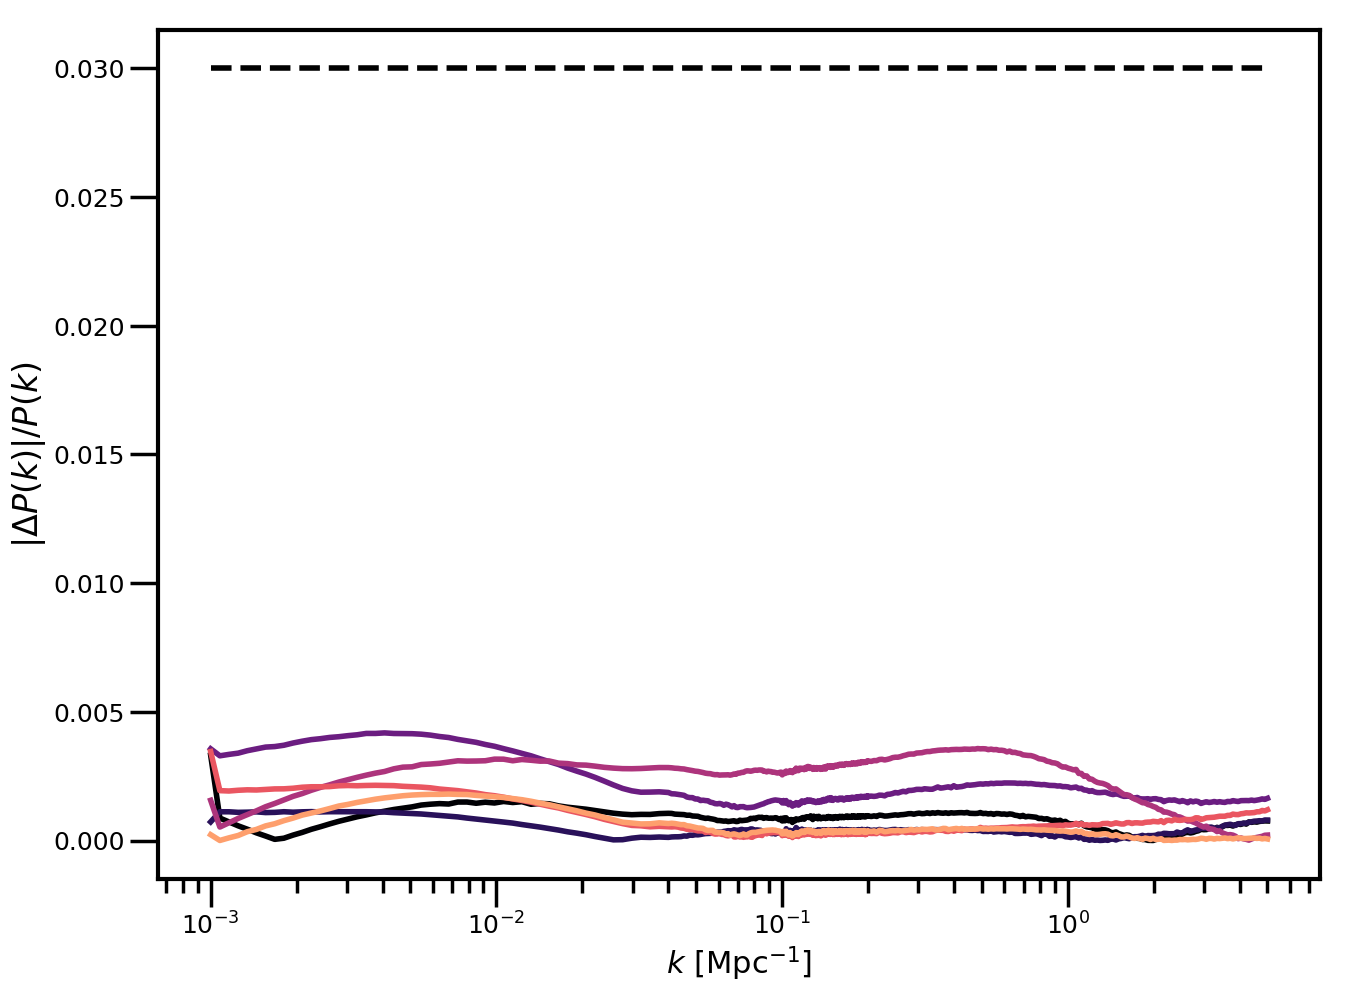

<Figure size 1500x1125 with 0 Axes>

In [10]:
emu_cosmo_mat=np.loadtxt('../tests/benchmark/emu_cosmologies.txt')
Omega_c_emu=emu_cosmo_mat[:,0]
Omega_b_emu=emu_cosmo_mat[:,1]
h_emu=emu_cosmo_mat[:,2]
sigma8_emu=emu_cosmo_mat[:,3]
ns_emu=emu_cosmo_mat[:,4]
w0_emu=emu_cosmo_mat[:,5]
wa_emu=emu_cosmo_mat[:,6]
models = np.array([1,3,5,6,8,10])
colvec=plt.cm.magma(np.linspace(0,0.8,len(models)))
plt.figure()
plt.ylabel(r'$|\Delta P(k)|/P(k)$',fontsize=24)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_xscale('log')
for i_model in range(0,len(models)):
    params_emu=ccl.Parameters(Omega_c=Omega_c_emu[i_model], Omega_b=Omega_b_emu[i_model], h=h_emu[i_model], 
                              sigma8 = sigma8_emu[i_model], n_s=ns_emu[i_model], w0=w0_emu[i_model], wa=wa_emu[i_model],Neff=3.04)
    params_emu.parameters.Omega_l=params_emu.parameters.Omega_l+params_emu.parameters.Omega_g
    params_emu.parameters.Omega_g =0.
    cosmo_emu = ccl.Cosmology(params_emu,transfer_function='emulator',matter_power_spectrum='emu')
    pk_emu=np.loadtxt("../tests/benchmark/emu_smooth_pk_M"+str(models[i_model])+".txt")
    pk_ccl=ccl.nonlin_matter_power(cosmo_emu,pk_emu[:,0],1.)
    plt.plot(pk_emu[:,0],np.abs(pk_ccl/pk_emu[:,1]-1.),'-',color=colvec[i_model])
    
plt.plot(pk_emu[:,0],np.ones(len(pk_emu[:,0]))*3e-2,'k--')    
plt.show()
plt.clf()

### Cosmological Emulator - with neutrinos

Similar to the case above, but for cosmologies with neutrinos.

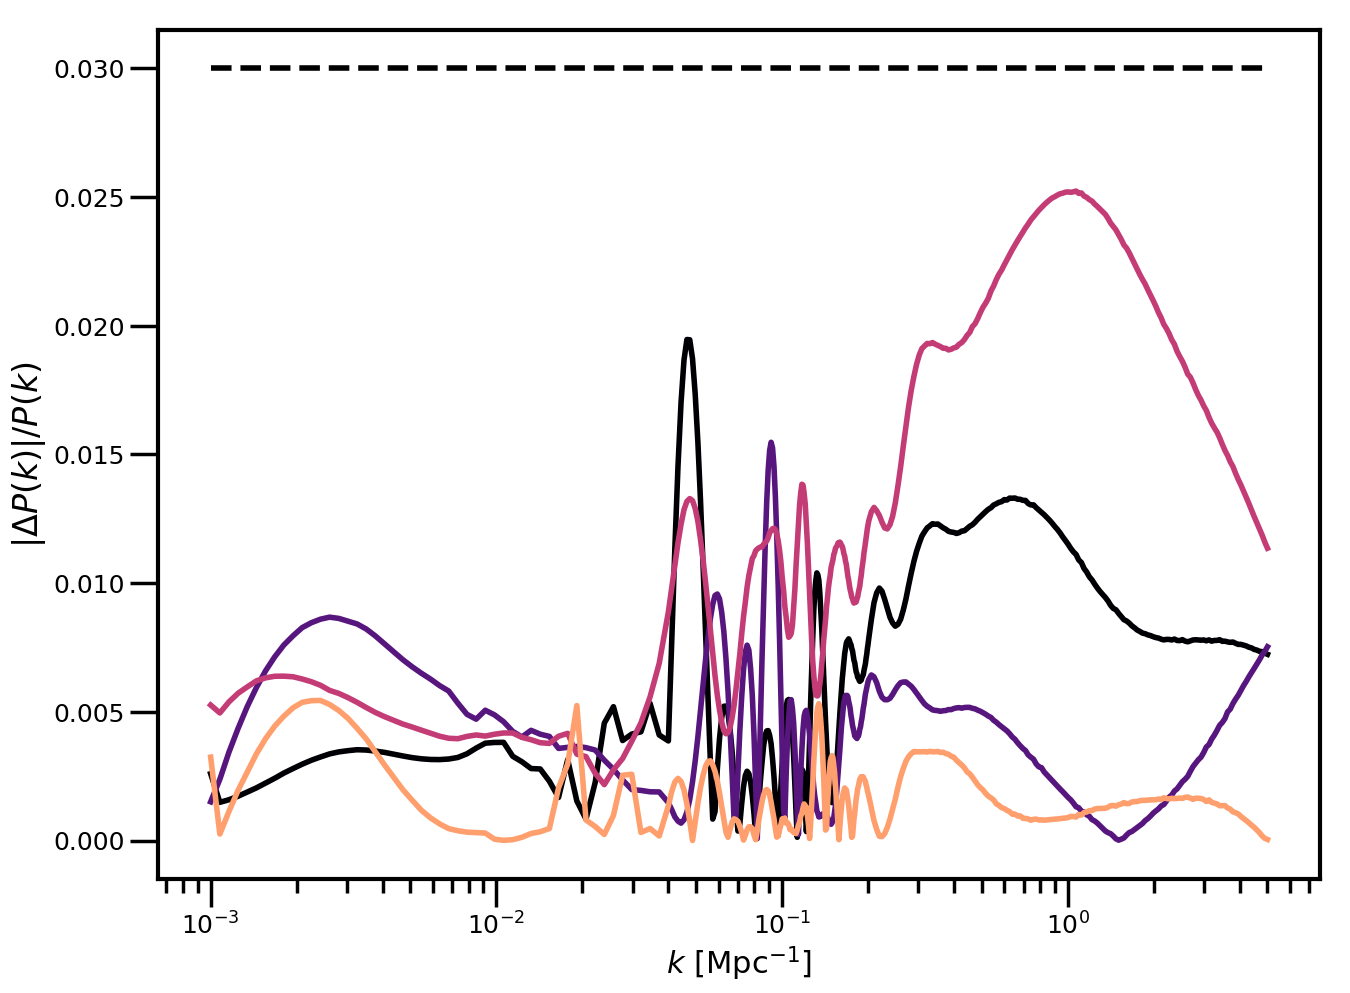

<Figure size 1500x1125 with 0 Axes>

In [11]:
emu_cosmo_mat=np.loadtxt('../tests/benchmark/emu_nu_cosmologies.txt')
Omega_c_emu=emu_cosmo_mat[:,0]
Omega_b_emu=emu_cosmo_mat[:,1]
h_emu=emu_cosmo_mat[:,2]
sigma8_emu=emu_cosmo_mat[:,3]
ns_emu=emu_cosmo_mat[:,4]
w0_emu=emu_cosmo_mat[:,5]
wa_emu=emu_cosmo_mat[:,6]
Omega_nu_emu=emu_cosmo_mat[:,7]
models = np.array([38,39,40,42])
colvec=plt.cm.magma(np.linspace(0,0.8,len(models)))
plt.figure()
plt.ylabel(r'$|\Delta P(k)|/P(k)$',fontsize=24)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_xscale('log')
for i_model in range(0,len(models)):
    #Figure out the neutrino mass for this Omega_nu:
    Mnu_out = ccl.nu_masses(Omega_nu_emu[i_model]*h_emu[i_model]**2, 'equal', 2.725)
    params_emu=ccl.Parameters(Omega_c=Omega_c_emu[i_model], Omega_b=Omega_b_emu[i_model], h=h_emu[i_model], 
                              sigma8 = sigma8_emu[i_model],m_nu=Mnu_out, n_s=ns_emu[i_model], w0=w0_emu[i_model], 
                              wa=wa_emu[i_model],Neff=3.04)
    params_emu.parameters.Omega_l=params_emu.parameters.Omega_l+params_emu.parameters.Omega_g
    params_emu.parameters.Omega_g =0.
    cosmo_emu = ccl.Cosmology(params_emu,transfer_function='emulator',matter_power_spectrum='emu')
    pk_emu=np.loadtxt("../tests/benchmark/emu_nu_smooth_pk_M"+str(models[i_model])+".txt")
    pk_ccl=ccl.nonlin_matter_power(cosmo_emu,pk_emu[:,0],1.)
    plt.plot(pk_emu[:,0],np.abs(pk_ccl/pk_emu[:,1]-1.),'-',color=colvec[i_model])
    
plt.plot(pk_emu[:,0],np.ones(len(pk_emu[:,0]))*3e-2,'k--')    
plt.show()
plt.clf()

### Baryonic correction model
Test that we have implemented this model correctly. The tolerance is 1E-4.

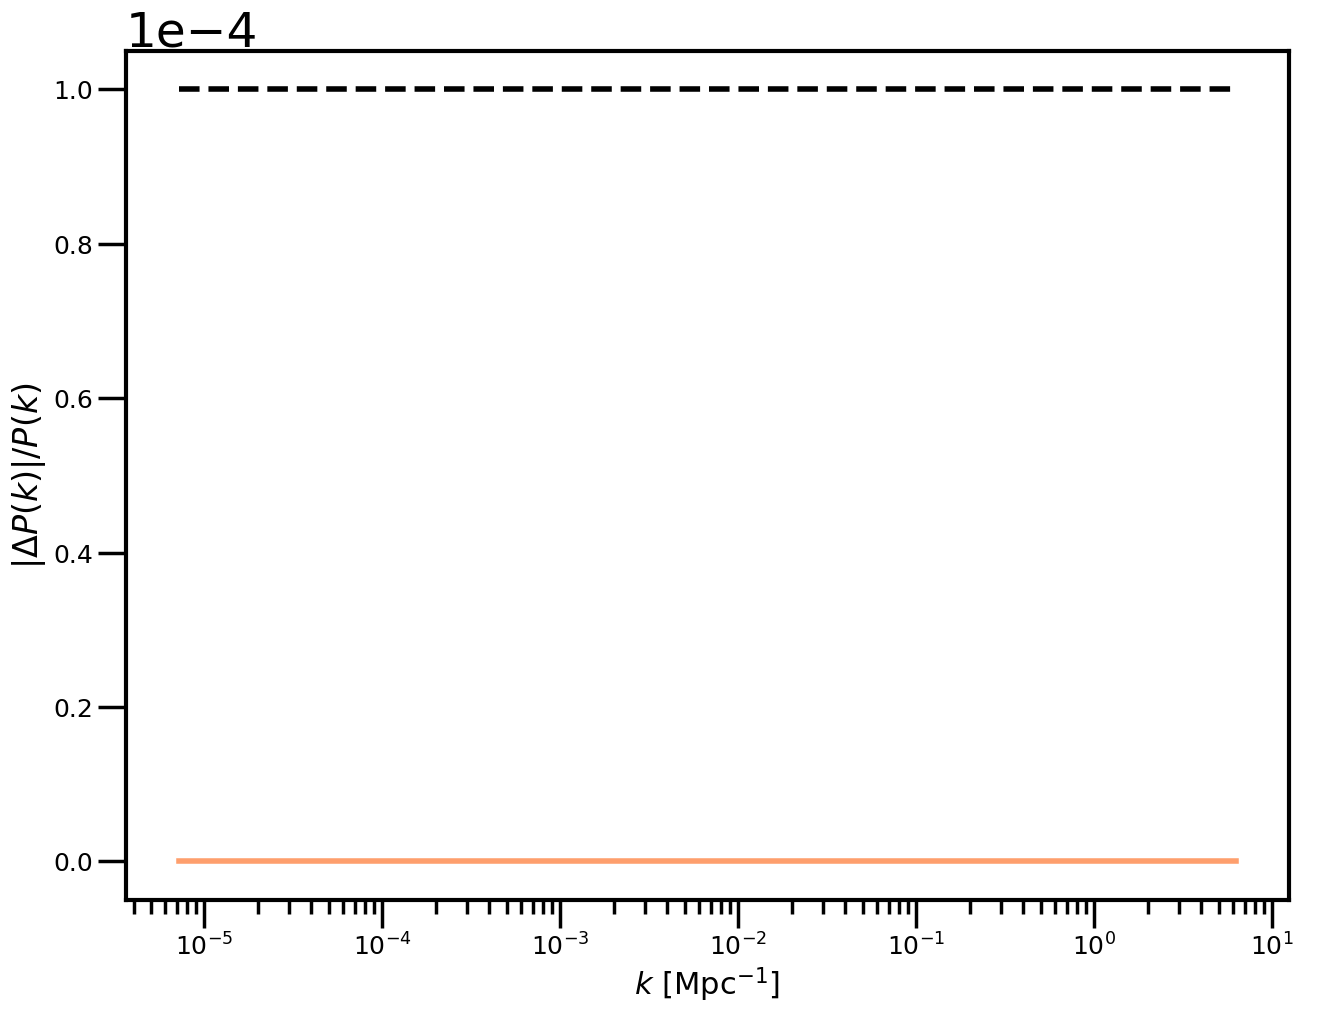

<Figure size 1500x1125 with 0 Axes>

In [12]:
params_bar=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.2e-9, n_s=0.96, Neff=3.046,bcm_log10Mc=14.)
params_nobar=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.2e-9, n_s=0.96, Neff=3.046)
params_bar.parameters.Omega_l=params_bar.parameters.Omega_l+params_bar.parameters.Omega_g
params_bar.parameters.Omega_g =0.
params_nobar.parameters.Omega_l=params_nobar.parameters.Omega_l+params_nobar.parameters.Omega_g
params_nobar.parameters.Omega_g =0.
cosmo_nobar = ccl.Cosmology(params_nobar)
cosmo_bar = ccl.Cosmology(params_bar,baryons_power_spectrum='bcm')

pk_bench_bar=np.loadtxt('../tests/benchmark/bcm/w_baryonspk_nl.dat')
pk_bench_nobar=np.loadtxt('../tests/benchmark/bcm/wo_baryonspk_nl.dat')

pk_ccl_bar=ccl.nonlin_matter_power(cosmo_bar,pk_bench_bar[:,0]*0.7,1.)
pk_ccl_nobar=ccl.nonlin_matter_power(cosmo_nobar,pk_bench_bar[:,0]*0.7,1.)

plt.figure()
plt.ylabel(r'$|\Delta P(k)|/P(k)$',fontsize=24)
plt.xlabel(r'$k$ [Mpc$^{-1}$]',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_xscale('log')
plt.plot(pk_bench_bar[:,0]*0.7,np.abs(pk_ccl_bar/pk_ccl_nobar/(pk_bench_bar[:,1]/pk_bench_nobar[:,1])-1.),'-',color=colvec[i_model])
plt.plot(pk_bench_bar[:,0]*0.7,np.ones(len(pk_bench_bar[:,0]))*1e-4,'k--')    
plt.show()
plt.clf()

### To-do: ensure all plots match the level of accuracy of Table 3.

### To-do: repeat the same exercise above test by test for all entries in Table 3. This can be done looking at the .c files in tests/

### Testing Mass function

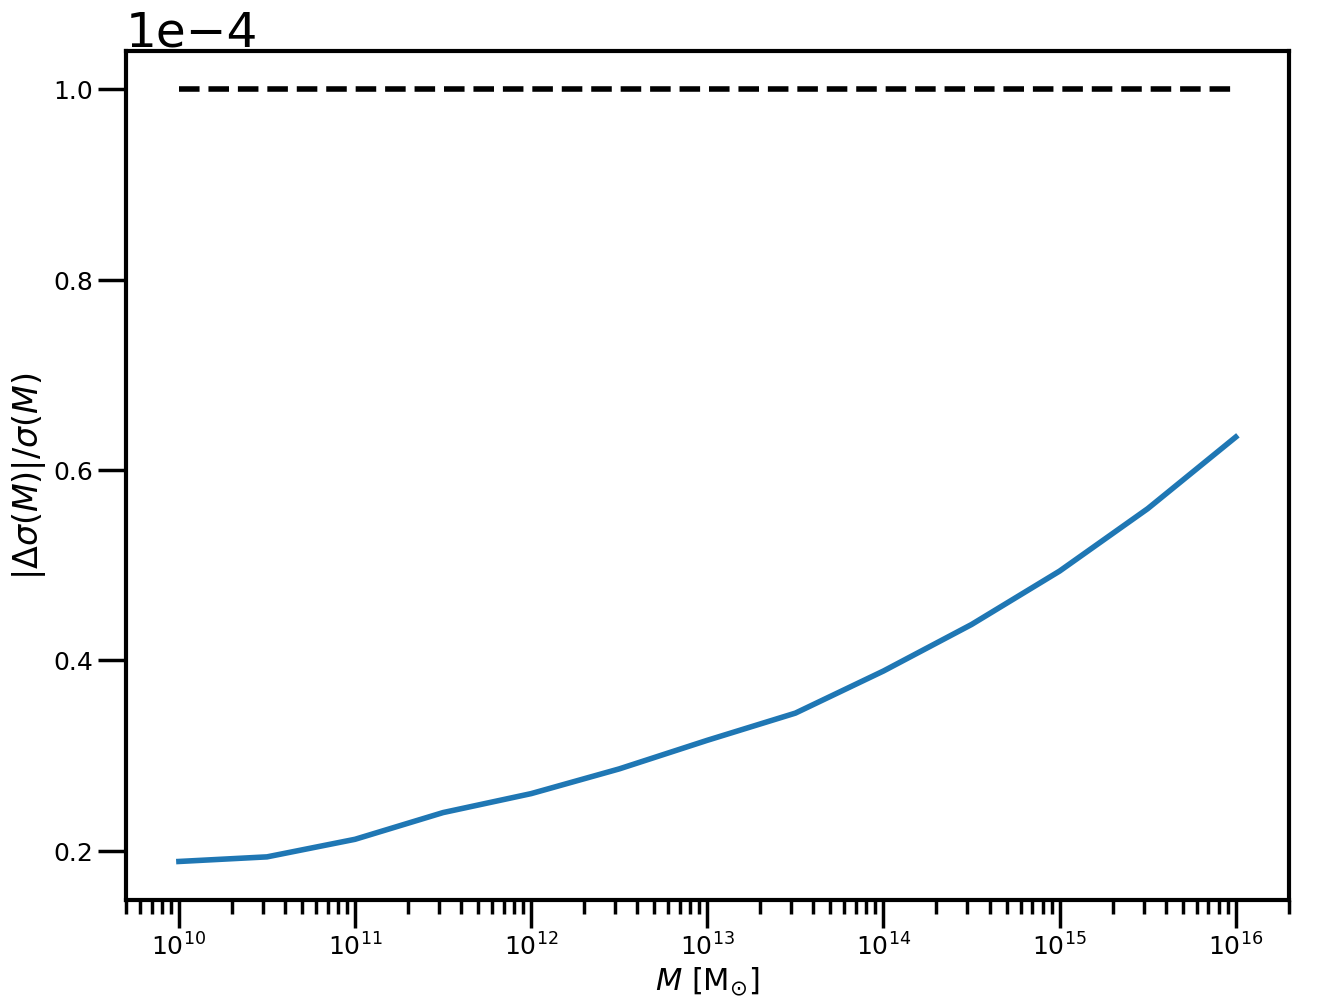

In [13]:
bench=np.loadtxt('../tests/benchmark/model1_hmf.txt')
log10mass = bench[0:,0]
sigma = bench[0:,1]
log10invsigma = bench[0:,2]
log10massfunc = bench[0:,3]

scale_fact = 1.

# setting up different cosmology configuration to match benchmarks and keep CLASS from crashing.
params_ccl1_mf=ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96)
params_ccl1_mf.parameters.Omega_g =0.
params_ccl1_mf.parameters.Omega_l =0.7
params_ccl1_mf.parameters.sigma_8 =0.8
#Only now that parameters are correct we can set up the cosmology
cosmo_ccl1_mf = ccl.Cosmology(params_ccl1_mf, transfer_function='bbks', mass_function='tinker')

plt.figure()
plt.ylabel(r'$|\Delta \sigma(M)|/\sigma(M)$',fontsize=24)
plt.xlabel(r'$M$ [M$_{\odot}$]',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_xscale('log')
plt.plot(10**log10mass, np.abs(ccl.sigmaM(cosmo_ccl1_mf,10**log10mass,scale_fact)/sigma-1))
plt.plot(10**log10mass,np.ones(len(log10mass))*1e-4,'k--')

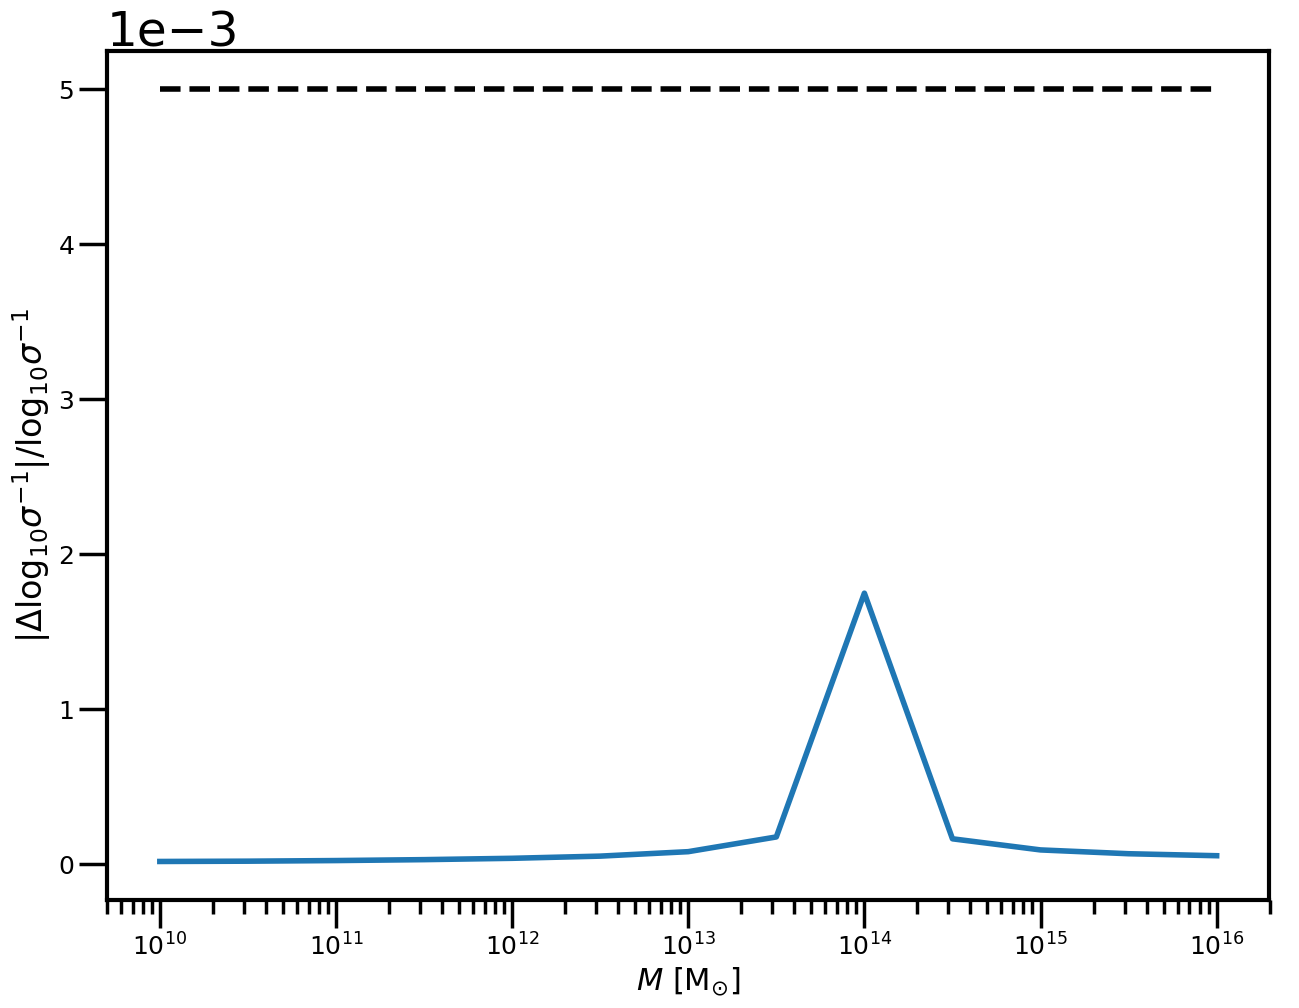

In [14]:
# strange spike in this demanded reduction of total accuracy. Since sigmaM matches well, we didn't worry about it too much.
# inaccuracy in halo mass function potentially much higher.

plt.figure()
plt.ylabel(r'$|\Delta \log_{10}\sigma^{-1}|/\log_{10}\sigma^{-1}$',fontsize=24)
plt.xlabel(r'$M$ [M$_{\odot}$]',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_xscale('log')
plt.plot(10**log10mass, np.abs(np.log10(1./ccl.sigmaM(cosmo_ccl1_mf,10**log10mass,scale_fact))/log10invsigma-1))
plt.plot(10**log10mass,np.ones(len(log10mass))*5e-3,'k--')


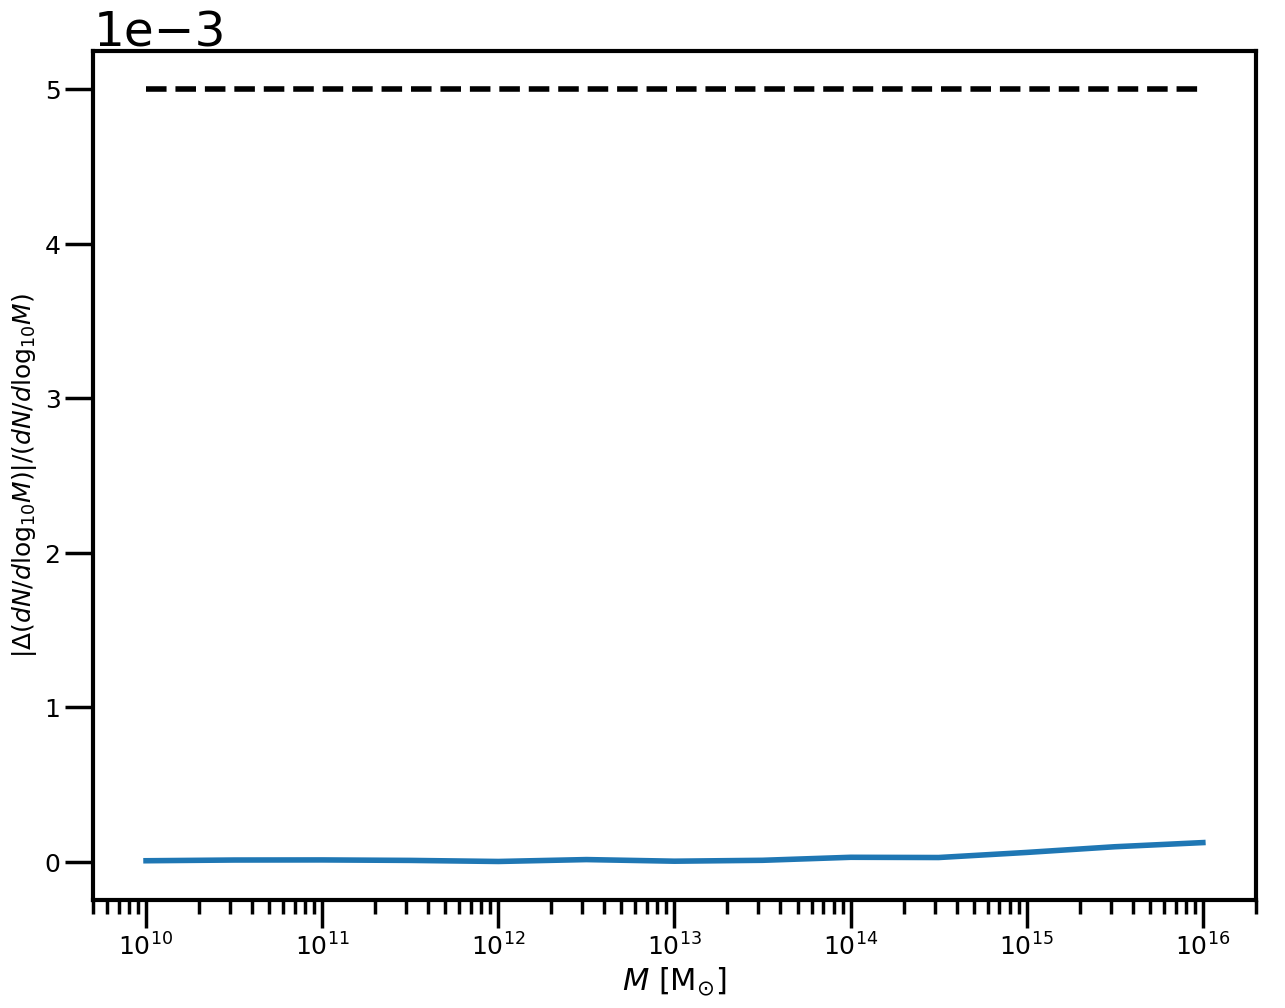

In [15]:
# we currently have listed 5e-3 accuracy as our target, but clearly much better fit here. The spike in our inverse
# sigma spline is not that impactful here.

rho_m = ccl.constants.RHO_CRITICAL*cosmo_ccl1_mf.params.parameters.Omega_m*cosmo_ccl1_mf.params.parameters.h**2
logmassfunc_test = np.log10(ccl.massfunc(cosmo_ccl1_mf, 10**log10mass, scale_fact)*(10**log10mass)/rho_m/np.log(10))

plt.figure()
plt.ylabel(r'$|\Delta (dN/d\log_{10}M)|/(dN/d\log_{10}M)$',fontsize=18)
plt.xlabel(r'$M$ [M$_{\odot}$]',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_xscale('log')
plt.plot(10**log10mass, np.abs(logmassfunc_test/log10massfunc-1))
plt.plot(10**log10mass,np.ones(len(log10mass))*5e-3,'k--')